In [1]:
# pip install numba --upgrade
# pip install pygraphviz
import sys
sys.path.insert(0, "/Users/yhhan/git/aiclass/0.Professor/")

import tensorflux.graph as tfg
import tensorflux.deep_learning_networks as tfn
import tensorflux.enums as tfe
import datasource.mnist as mnist
import tensorflux.functions as tff
import math
import numba
print(numba.__version__)
%matplotlib inline

0.35.0


In [2]:
input_size = 784
hidden_layer1_size = 128
hidden_layer2_size = 128
output_size = 10

x = tfg.Placeholder(name="x")
target = tfg.Placeholder(name="target")

n = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    initializer=tfe.Initializer.Normal.value,
    init_sd=0.01,
    # initializer=tfe.Initializer.Xavier.value,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.Adam.value,
    learning_rate=0.001
)

Multi Layer Network Model - ID: GH9BR0OO


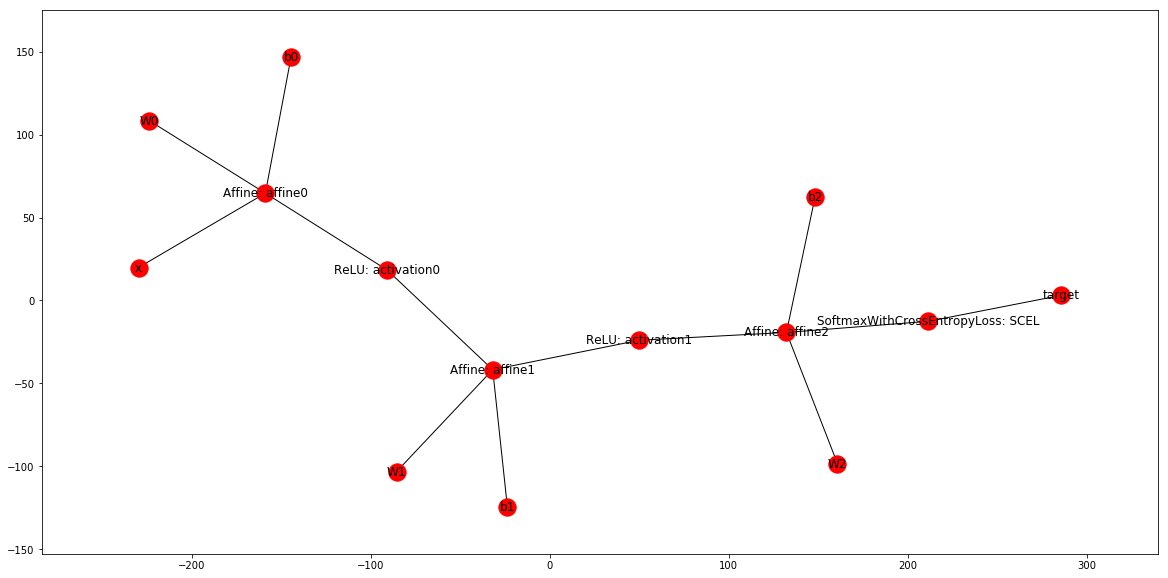

In [3]:
n.draw_and_show(figsize=(20, 10))

In [4]:
data = mnist.MNIST_Data(validation_size=5000, n_splits=12, is_onehot_target=True)
#data = mnist.Fashion_MNIST_Data(validation_size=5000, n_splits=12, is_onehot_target=True)

In [5]:
forward_final_output = n.feed_forward(input_data=data.test_input, is_numba=False)
#print(forward_final_output.shape)
print("Initial Accuracy", tff.accuracy(forward_final_output, data.test_target))

batch_size = 1000
#%timeit -n1 -r1 n.learning(
n.learning(
    max_epoch=5, 
    data=data, 
    batch_size=batch_size, 
    print_period=1, 
    is_numba=True, 
    verbose=False
)

forward_final_output = n.feed_forward(input_data=data.test_input, is_numba=False)
print("Post-learning Accuracy", tff.accuracy(forward_final_output, data.test_target))

Initial Accuracy 0.1021
-- Learning Started --
Fold:  0
Epoch   0 Completed - Train Error:2.31678 - Validation Error:2.31366 - Test Accuracy:0.10210 <== Minimal Val. Error
Epoch   1 Completed - Train Error:0.14925 - Validation Error:0.19982 - Test Accuracy:0.94000 <== Minimal Val. Error
Epoch   2 Completed - Train Error:0.13405 - Validation Error:0.12943 - Test Accuracy:0.95880 <== Minimal Val. Error
Epoch   3 Completed - Train Error:0.08280 - Validation Error:0.11010 - Test Accuracy:0.96270 <== Minimal Val. Error
Epoch   4 Completed - Train Error:0.08301 - Validation Error:0.10471 - Test Accuracy:0.96550 <== Minimal Val. Error
Epoch   5 Completed - Train Error:0.06023 - Validation Error:0.10692 - Test Accuracy:0.96370

[Best Epoch (based on Validation Error) and Its Performance]
Global Epoch:  4 (Fold:  0 & Epoch:  4) - Train Error:0.08301 - Validation Error:0.10471 - Test Accuracy:0.96550

Fold:  1
Epoch   1 Completed - Train Error:0.03894 - Validation Error:0.09053 - Test Accuracy:0

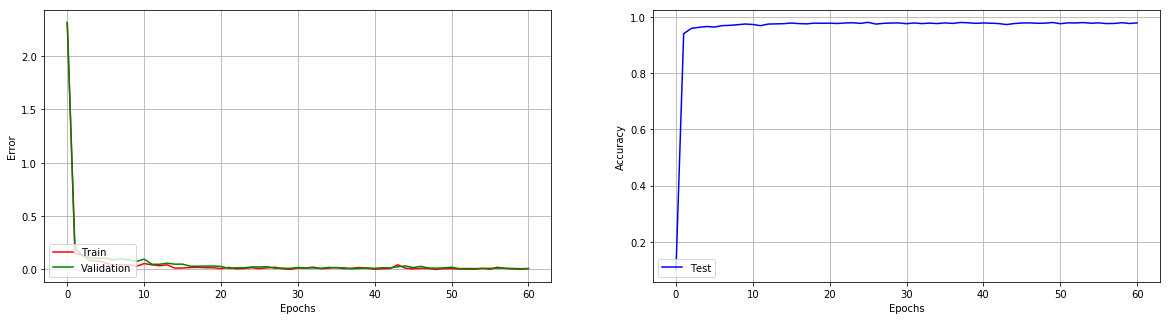

In [6]:
n.draw_error_values_and_accuracy(figsize=(20, 5))

(10000,)
(10000,)
False Prediction Index: 149, Prediction: Five, Ground Truth: Two
False Prediction Index: 247, Prediction: Two, Ground Truth: Four
False Prediction Index: 321, Prediction: Seven, Ground Truth: Two
False Prediction Index: 340, Prediction: Three, Ground Truth: Five
False Prediction Index: 381, Prediction: Seven, Ground Truth: Three


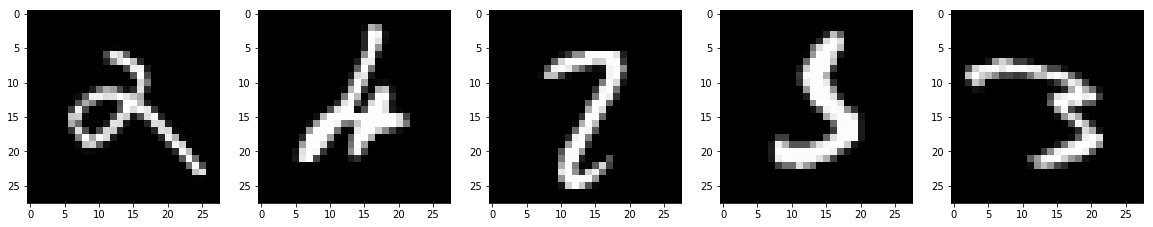

In [7]:
n.draw_false_prediction(data.test_input, data.test_target, data.labels, num=5, figsize=(20, 5))

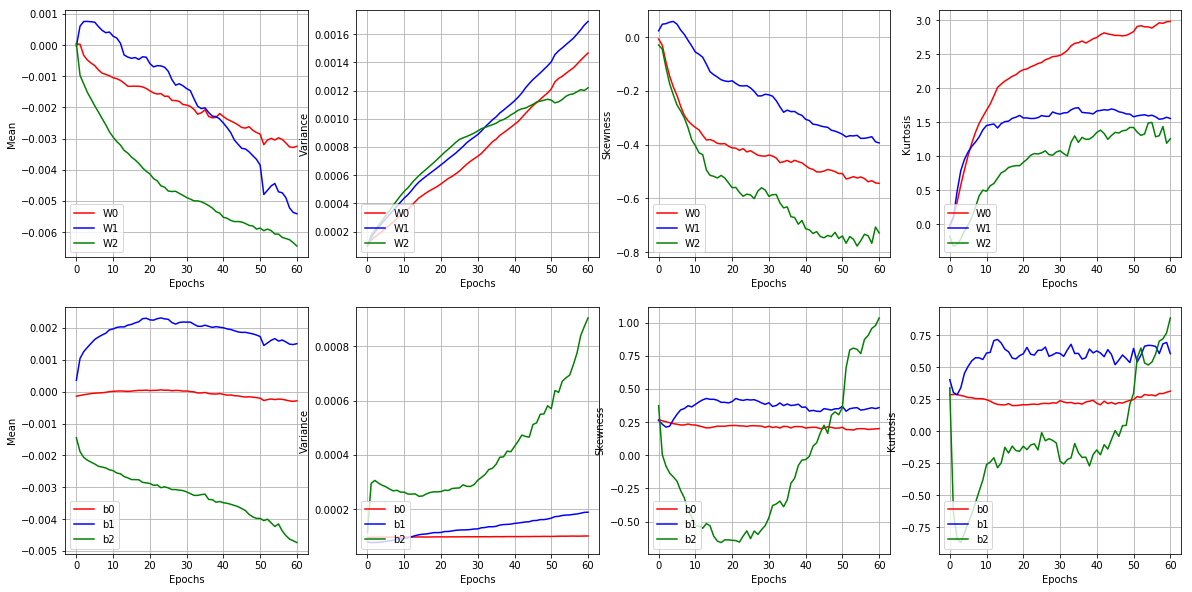

In [8]:
n.draw_param_description(figsize=(20, 10))